You can do data cleaning and merge in many different ways. so my results might differ from yours. please make sure your way of doing is appropriate

Interactive plots at the end are done using plotly

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact




In [96]:
!pip install ipywidgets plotly

In [89]:
import pandas as pd

# Read Netflix data from CSV
netflix = pd.read_csv('netflix_titles.csv')
# Read title data from TSV and rename columns
title_df = pd.read_csv('title_basics_data.tsv', sep='\t').rename(columns={'primaryTitle':'title', 'startYear':'release_year'})
# Read rating data from TSV
rating_df = pd.read_csv('title_ratings_data.tsv', sep='\t')
# Merge title_df and rating_df
title_rating_df = title_df.merge(rating_df, on='tconst', how='left')
# Replace '\\N' with NaN for better handling
title_rating_df['release_year'].replace('\\N', pd.NA, inplace=True)
# Convert 'release_year' column to numeric and then to int64
title_rating_df['release_year'] = pd.to_numeric(title_rating_df['release_year'], errors='coerce').astype('Int64')
# Replace missing values with a default integer value, such as -1
title_rating_df['release_year'].fillna(-1, inplace=True)
# Merge netflix and title_rating_df on 'title' and 'release_year'
netflix_df = netflix.merge(title_rating_df, on=['title', 'release_year'])


In [90]:
netflix_df

show_id   type                title          director  \
0        s8  Movie              Sankofa      Haile Gerima   
1       s25  Movie                Jeans        S. Shankar   
2       s42  Movie                 Jaws  Steven Spielberg   
3       s43  Movie               Jaws 2    Jeannot Szwarc   
4       s45  Movie    Jaws: The Revenge    Joseph Sargent   
..      ...    ...                  ...               ...   
913   s8765  Movie           Wyatt Earp   Lawrence Kasdan   
914   s8767  Movie                  XXx         Rob Cohen   
915   s8774  Movie  Yanda Kartavya Aahe      Kedar Shinde   
916   s8803  Movie               Zodiac     David Fincher   
917   s8806  Movie                 Zoom      Peter Hewitt   

                                                  cast  \
0    Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
1    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
2    Roy Scheider, Robert Shaw, Richard Dreyfuss, L...   
3    Roy Scheider, Lorraine Gary, Murray Hamilton, ...   
4    Lorraine Gary, Lance Guest, Mario Van Peebles,...   
..                                                 ...   
913  Kevin Costner, Dennis Quaid, Gene Hackman, Dav...   
914  Vin Diesel, Asia Argento, Marton Csokas, Samue...   
915  Ankush Choudhary, Smita Shewale, Mohan Joshi, ...   
916  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
917  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   

                                               country          date_added  \
0    United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
1                                                India  September 21, 2021   
2                                        United States  September 16, 2021   
3                                        United States  September 16, 2021   
4                                        United States  September 16, 2021   
..                                                 ...                 ...   
913                                      United States     January 1, 2020   
914                                      United States     January 1, 2019   
915                                              India     January 1, 2018   
916                                      United States   November 20, 2019   
917                                      United States    January 11, 2020   

     release_year rating duration  ...  \
0            1993  TV-MA  125 min  ...   
1            1998  TV-14  166 min  ...   
2            1975     PG  124 min  ...   
3            1978     PG  116 min  ...   
4            1987  PG-13   91 min  ...   
..            ...    ...      ...  ...   
913          1994  PG-13  191 min  ...   
914          2002  PG-13  124 min  ...   
915          2006  TV-PG  151 min  ...   
916          2007      R  158 min  ...   
917          2006     PG   88 min  ...   

                                           description     tconst  titleType  \
0    On a photo shoot in Ghana, an American model s...  tt0108041      movie   
1    When the father of the man she loves insists t...  tt0151121      movie   
2    When an insatiable great white shark terrorize...  tt0073195      movie   
3    Four years after the last deadly shark attacks...  tt0077766      movie   
4    After another deadly shark attack, Ellen Brody...  tt0093300      movie   
..                                                 ...        ...        ...   
913  Legendary lawman Wyatt Earp is continually at ...  tt0111756      movie   
914  A notorious underground rush-seeker deemed unt...  tt0675523  tvEpisode   
915  Thanks to an arranged marriage that was design...  tt0845554      movie   
916  A political cartoonist, a crime reporter and a...  tt0443706      movie   
917  Dragged from civilian life, a former superhero...  tt0383060      movie   

           originalTitle isAdult  endYear runtimeMinutes  \
0                Sankofa     0.0       \N            125   
1                  Jeans     0.0       \N          

In [69]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tconst', 'titleType', 'originalTitle', 'isAdult', 'endYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')

**Question 1**

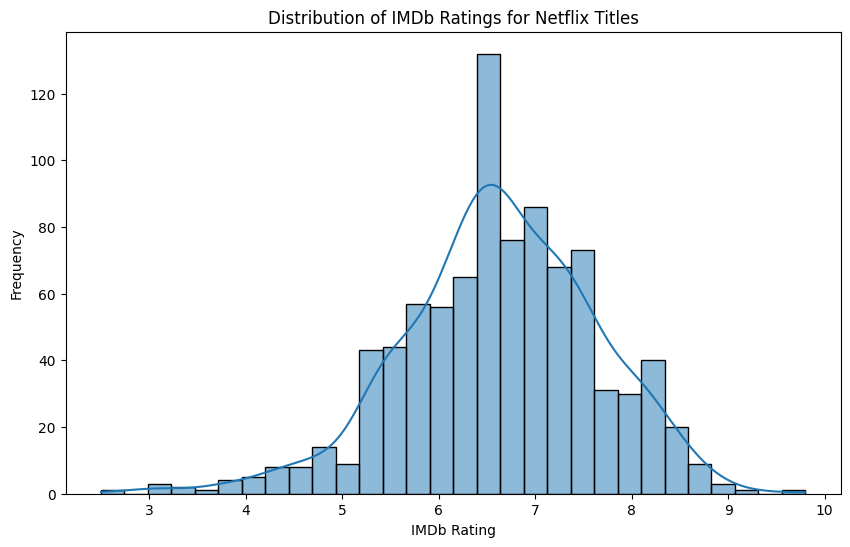

In [12]:
# Filter out rows with NaN IMDb ratings
netflix_df_filtered = netflix_df.dropna(subset=['averageRating'])

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_df_filtered, x='averageRating', bins=30, kde=True)
plt.title('Distribution of IMDb Ratings for Netflix Titles')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

Question 2

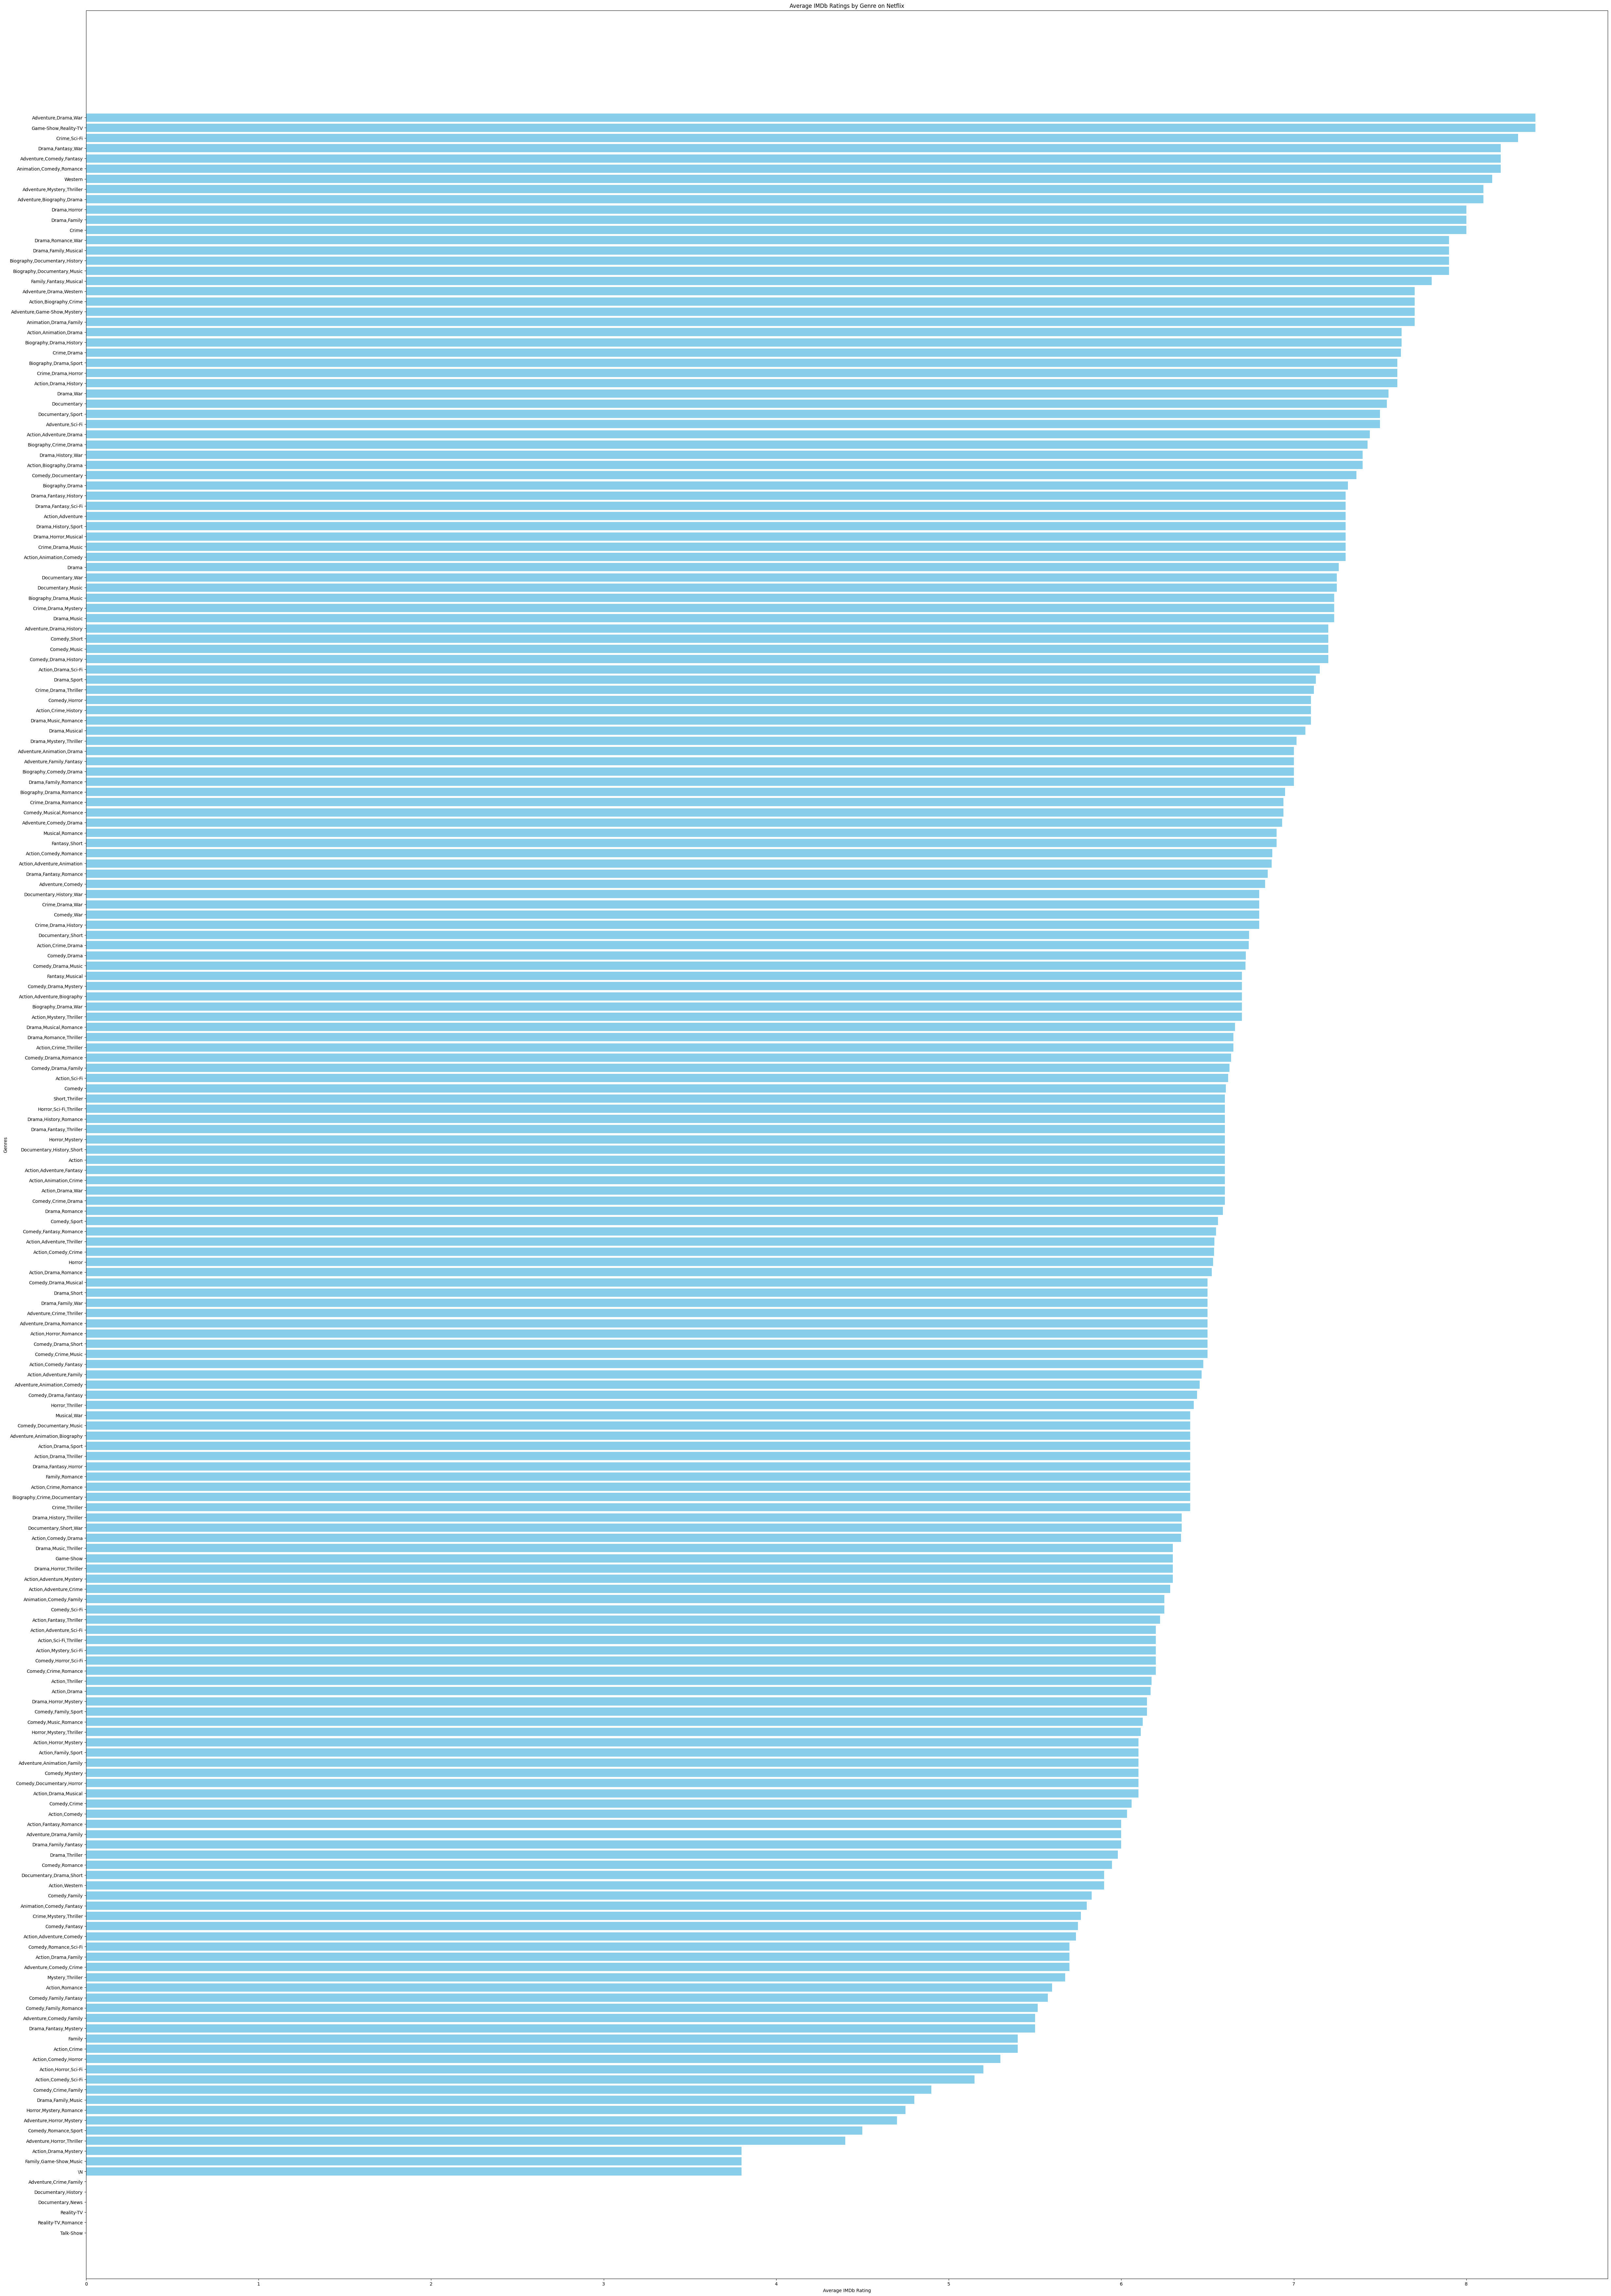

In [26]:
# Group the DataFrame by genre and calculate the mean IMDb rating for each genre
genre_ratings = netflix_df.groupby('genres')['averageRating'].mean().reset_index()

# Sort the genres by average IMDb rating in descending order
genre_ratings = genre_ratings.sort_values(by='averageRating', ascending=False)

# Create a bar chart to visualize the genres with the highest IMDb ratings
plt.figure(figsize=(60,90))
plt.barh(genre_ratings['genres'], genre_ratings['averageRating'], color='skyblue')
plt.title('Average IMDb Ratings by Genre on Netflix')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genres')
plt.gca().invert_yaxis()  # Reverse the order to show the highest ratings at the top
plt.show()

Question 3

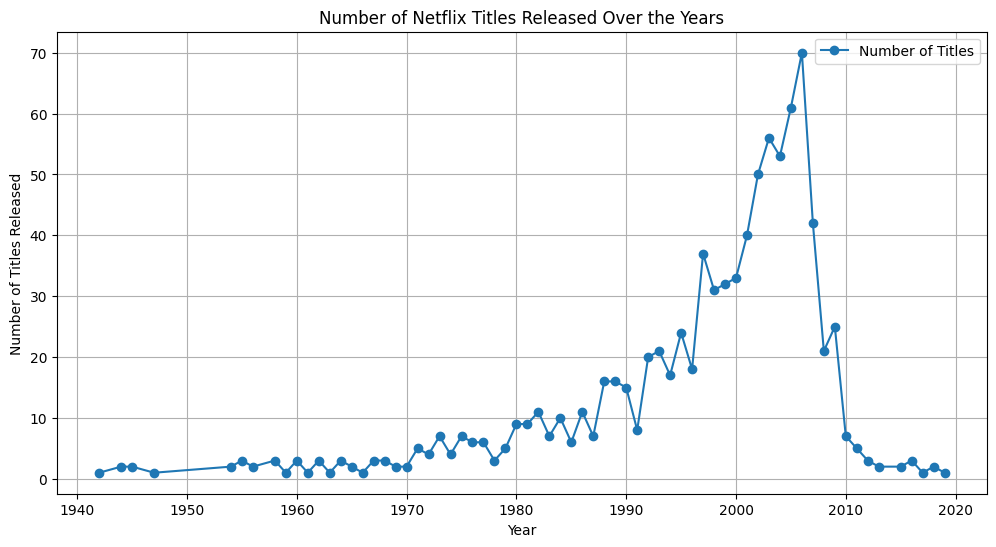

In [27]:


# Filter out rows with missing release years or IMDb ratings
filtered_df = netflix_df.dropna(subset=['release_year', 'averageRating'])

# Group the data by release year and calculate the count of titles released in each year
yearly_counts = filtered_df['release_year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Title Count']

# Sort the data by year in ascending order
yearly_counts = yearly_counts.sort_values(by='Year')

# Create a line plot to visualize the number of Netflix titles released over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Title Count'], marker='o', linestyle='-')
plt.title('Number of Netflix Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')

# Overlay IMDb ratings data, if desired
# IMDb_ratings_by_year = filtered_df.groupby('release_year')['averageRating'].mean()
# plt.plot(IMDb_ratings_by_year.index, IMDb_ratings_by_year.values, marker='o', linestyle='-', label='Average IMDb Rating')

plt.legend(['Number of Titles'])
plt.grid(True)
plt.show()


Question 4

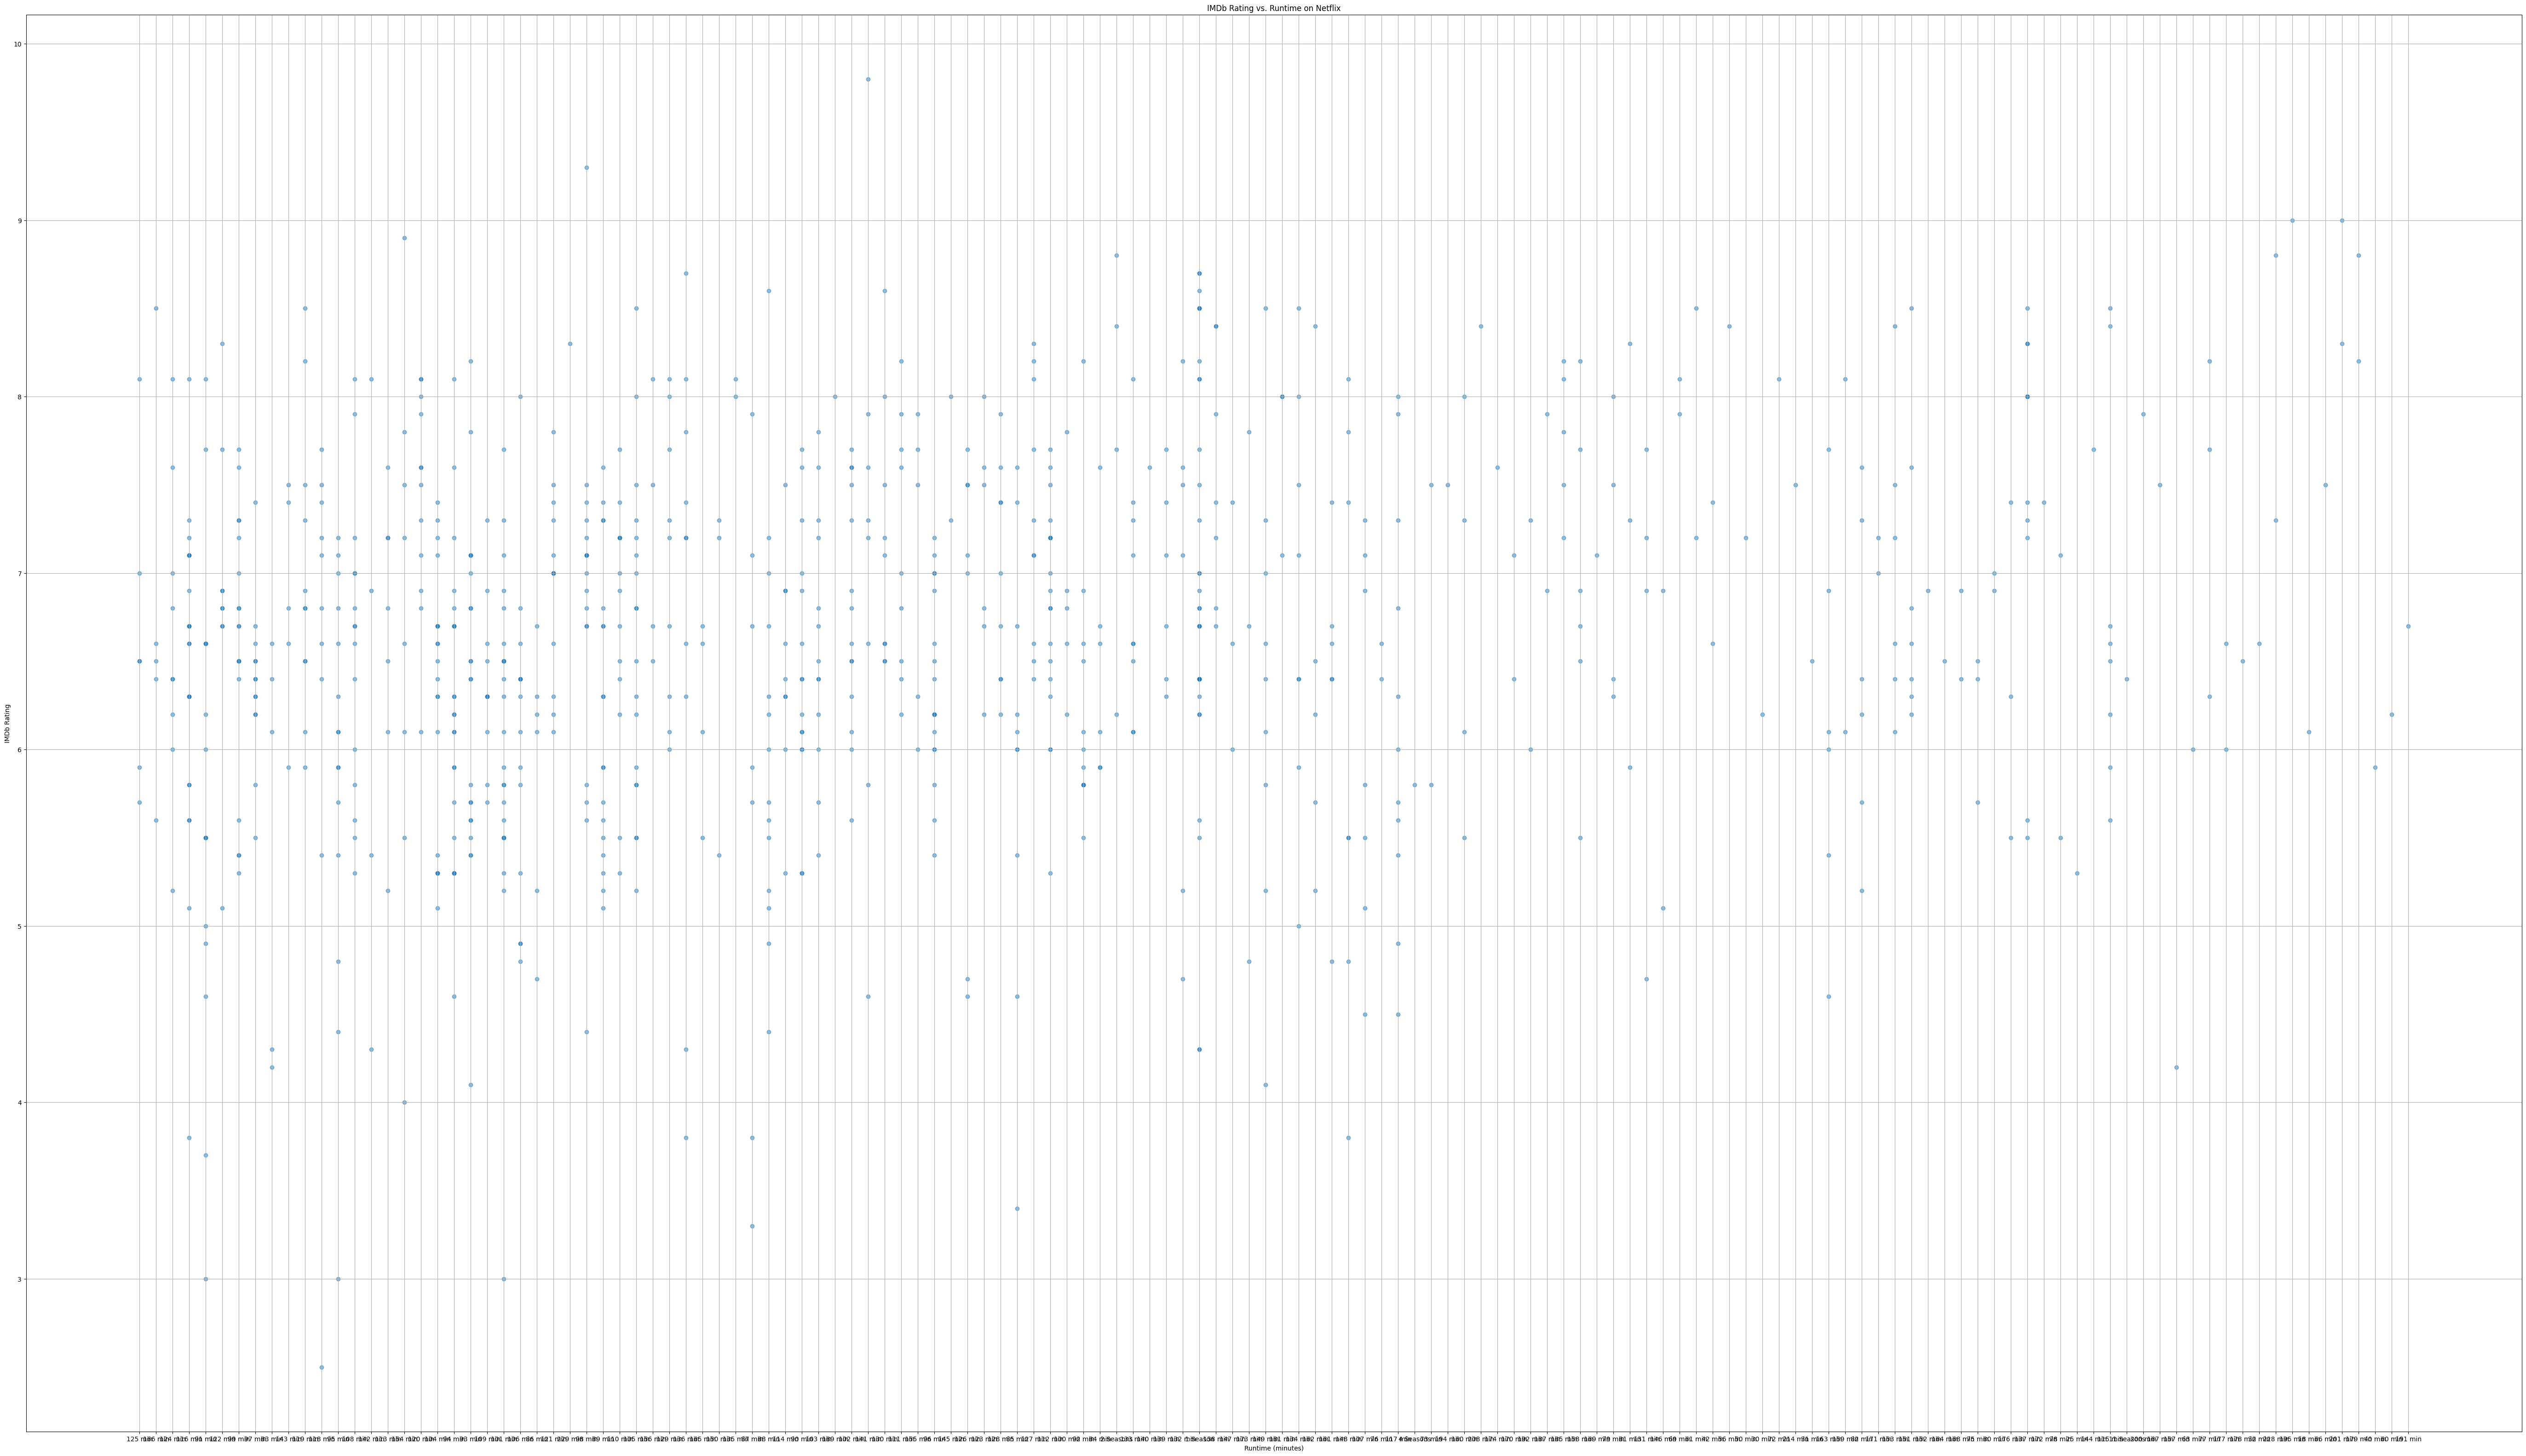

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'netflix_df' DataFrame with IMDb ratings and runtime information

# Filter out rows with missing IMDb ratings or runtime values
filtered_df = netflix_df.dropna(subset=['averageRating', 'duration'])

# Create a scatterplot to investigate the correlation
plt.figure(figsize=(70,40))
plt.scatter(filtered_df['duration'], filtered_df['averageRating'], alpha=0.5)
plt.title('IMDb Rating vs. Runtime on Netflix')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()


Question 5

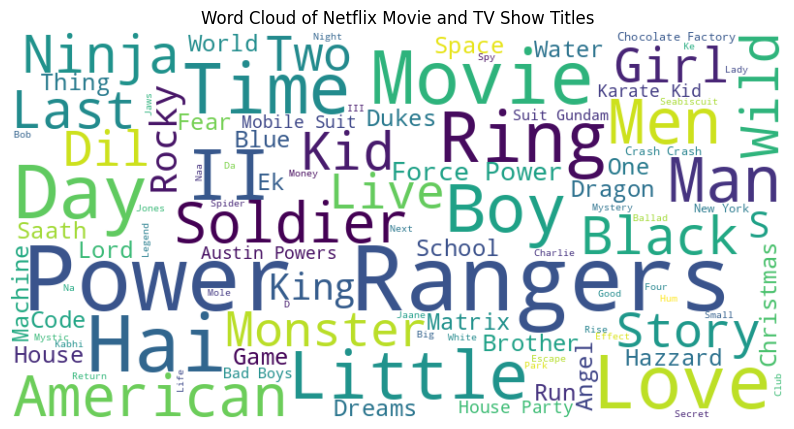

In [33]:

from wordcloud import WordCloud



# Concatenate all titles into a single string
titles_text = ' '.join(netflix_df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Netflix Movie and TV Show Titles')
plt.axis('off')
plt.show()


Question 6

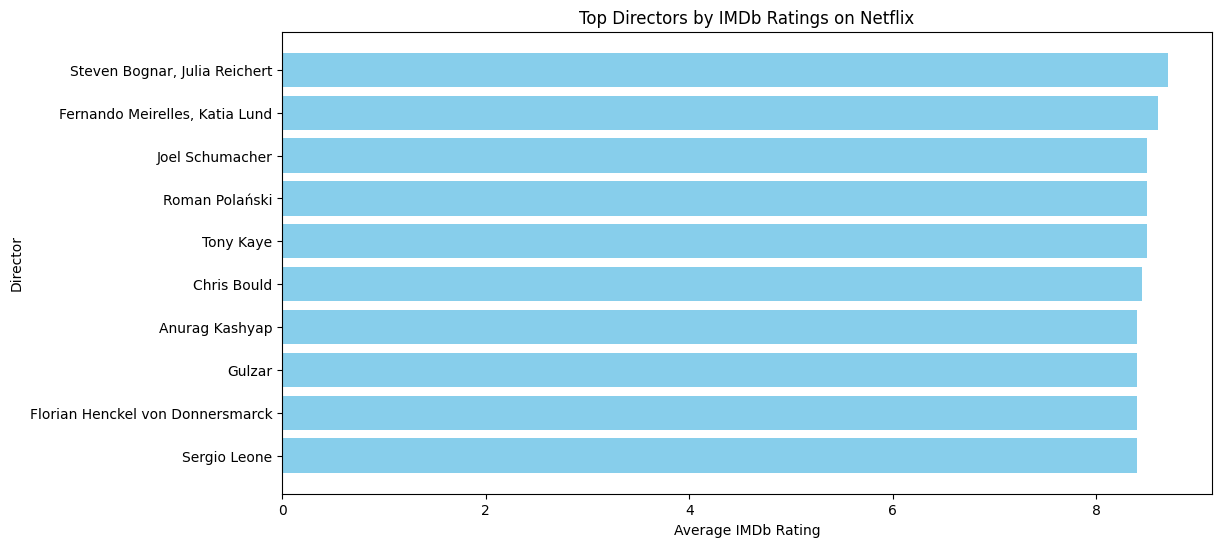

In [34]:


# Filter out rows with missing IMDb ratings or director information
filtered_df = netflix_df.dropna(subset=['averageRating', 'director'])

# Group the data by director and calculate the mean IMDb rating for each director
director_ratings = filtered_df.groupby('director')['averageRating'].mean().reset_index()

# Sort directors by average IMDb rating in descending order
director_ratings = director_ratings.sort_values(by='averageRating', ascending=False)

# Select the top N directors (you can adjust N as needed)
top_directors = director_ratings.head(10)  # Change '10' to the desired number of top directors

# Create a bar chart to showcase the influence of top directors
plt.figure(figsize=(12, 6))
plt.barh(top_directors['director'], top_directors['averageRating'], color='skyblue')
plt.title('Top Directors by IMDb Ratings on Netflix')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Reverse the order to show the highest ratings at the top
plt.show()


Question 7

<ipython-input-39-a79d813a9e12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['added_month'] = pd.to_datetime(filtered_df['date_added']).dt.to_period('M')


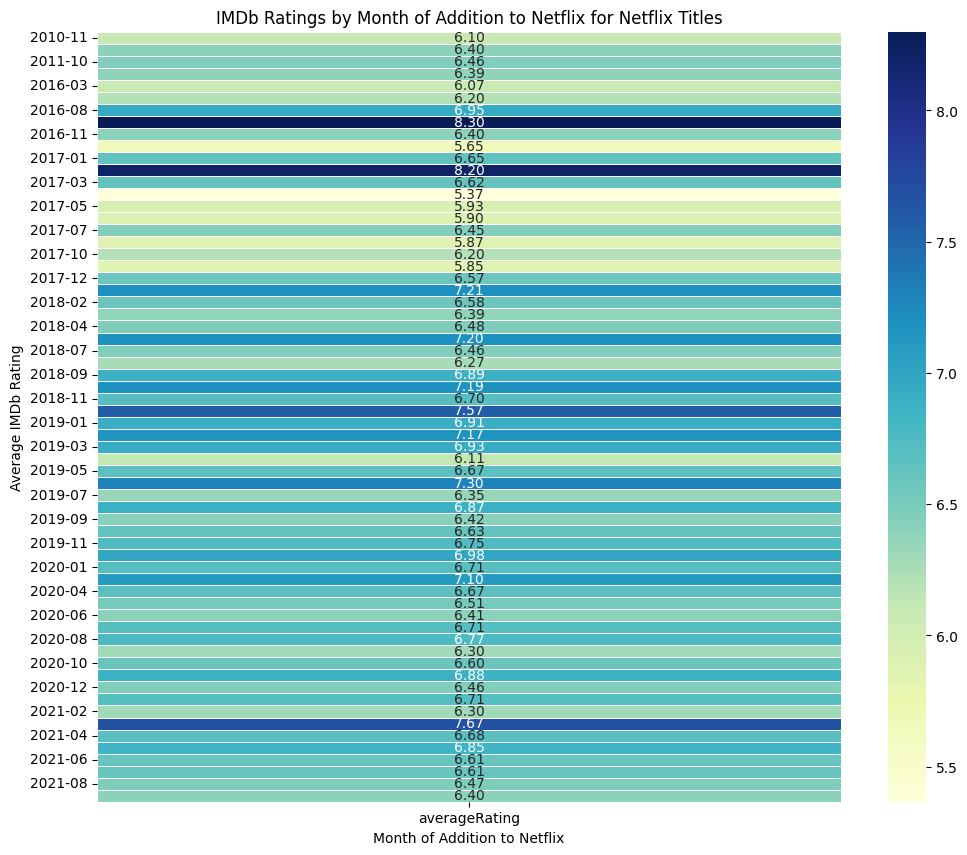

In [39]:


# Filter out rows with missing IMDb ratings or "date_added" values
filtered_df = netflix_df.dropna(subset=['averageRating', 'date_added'])

# Extract the month and year from the "date_added" column and create a new "added_month" column
filtered_df['added_month'] = pd.to_datetime(filtered_df['date_added']).dt.to_period('M')

# Create a pivot table to summarize IMDb ratings by added month
pivot_table = filtered_df.pivot_table(index='added_month', values='averageRating', aggfunc='mean')

# Create a heatmap to visualize trends in IMDb ratings by added month
plt.figure(figsize=(12, 10))
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('IMDb Ratings by Month of Addition to Netflix for Netflix Titles')
plt.xlabel('Month of Addition to Netflix')
plt.ylabel('Average IMDb Rating')
plt.show()


Question 8

<ipython-input-42-7f48cbbae29e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime_minutes'] = filtered_df['duration'].str.extract(f'(\d+) {duration_format}').astype(float)


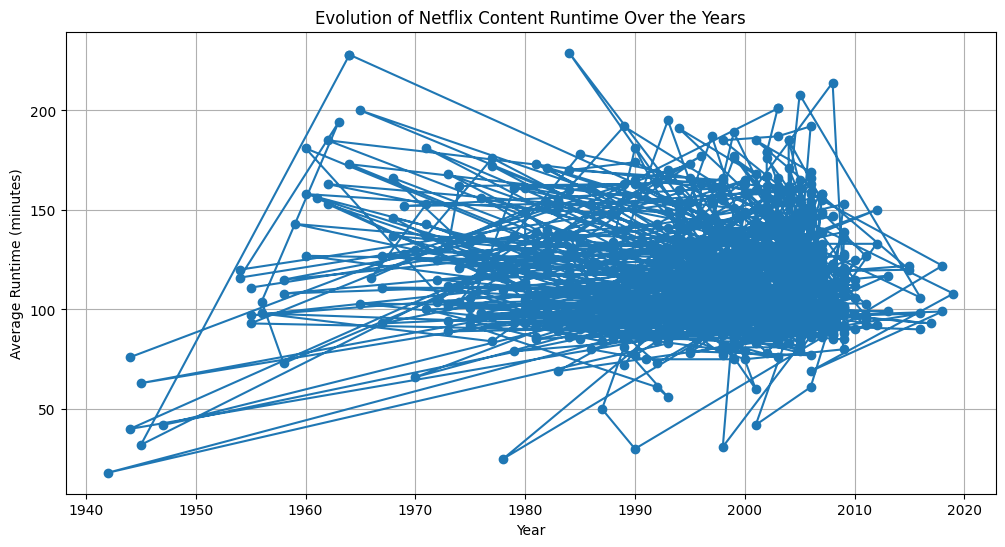

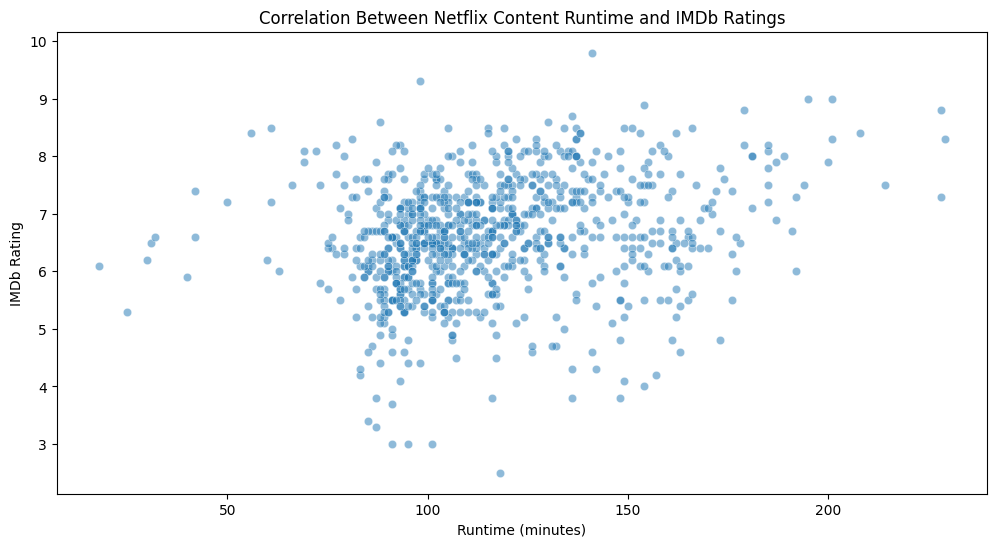

In [42]:


# Filter out rows with missing IMDb ratings, release years, and runtime values
filtered_df = netflix_df.dropna(subset=['averageRating', 'release_year', 'duration'])

# Check for unique values in the 'duration' column to identify the format
unique_durations = filtered_df['duration'].unique()

# Identify the format of durations, e.g., "18 min", "1 season", "2 seasons", etc.
# You may need to adapt this code depending on the actual formats in your data
duration_format = 'min'  # Assuming durations are in the "X min" format

# Extract numeric runtime values as integers and store in a new column
filtered_df['runtime_minutes'] = filtered_df['duration'].str.extract(f'(\d+) {duration_format}').astype(float)

# Create a line plot to visualize how runtime has evolved over the years
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['release_year'], filtered_df['runtime_minutes'], marker='o', linestyle='-')
plt.title('Evolution of Netflix Content Runtime Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)

# Create a scatterplot to explore the correlation between runtime and IMDb ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime_minutes', y='averageRating', data=filtered_df, alpha=0.5)
plt.title('Correlation Between Netflix Content Runtime and IMDb Ratings')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')

plt.show()


Question 9

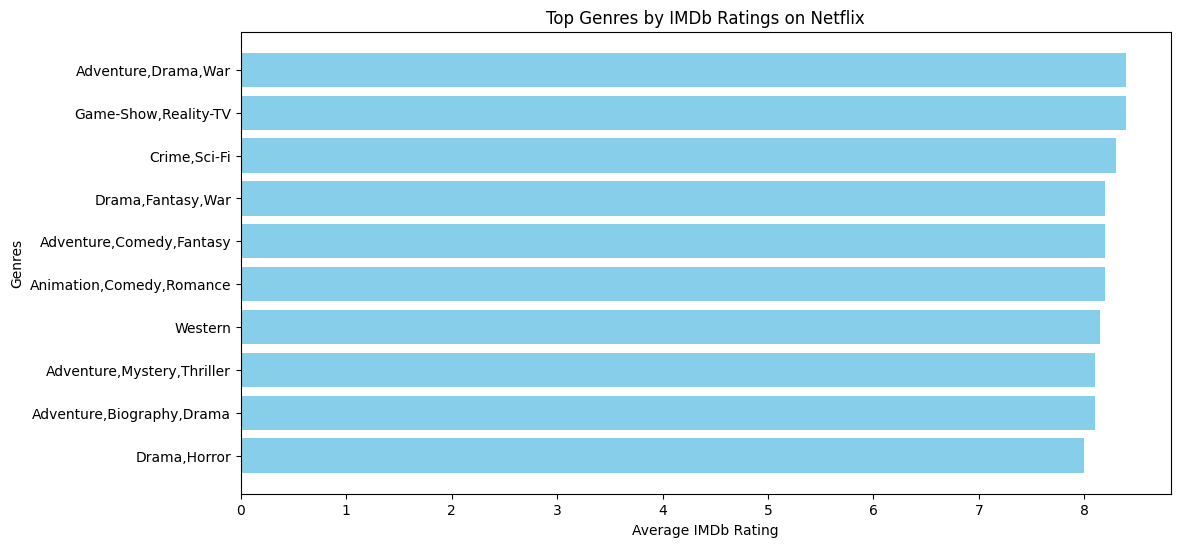

In [43]:


# Filter out rows with missing IMDb ratings or genre information
filtered_df = netflix_df.dropna(subset=['averageRating', 'genres'])

# Group the data by genre and calculate the mean IMDb rating for each genre
genre_ratings = filtered_df.groupby('genres')['averageRating'].mean().reset_index()

# Sort genres by average IMDb rating in descending order
genre_ratings = genre_ratings.sort_values(by='averageRating', ascending=False)

# Select the top N genres with the highest average IMDb ratings
top_genres = genre_ratings.head(10)  # Change '10' to the desired number of top genres

# Create a bar chart to visualize genres with the highest IMDb ratings
plt.figure(figsize=(12, 6))
plt.barh(top_genres['genres'], top_genres['averageRating'], color='skyblue')
plt.title('Top Genres by IMDb Ratings on Netflix')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genres')
plt.gca().invert_yaxis()  # Reverse the order to show the highest ratings at the top
plt.show()


Question 10

count    38.000000
mean      7.018421
std       1.169628
min       4.300000
25%       6.400000
50%       6.800000
75%       8.100000
max       8.800000
Name: averageRating, dtype: float64


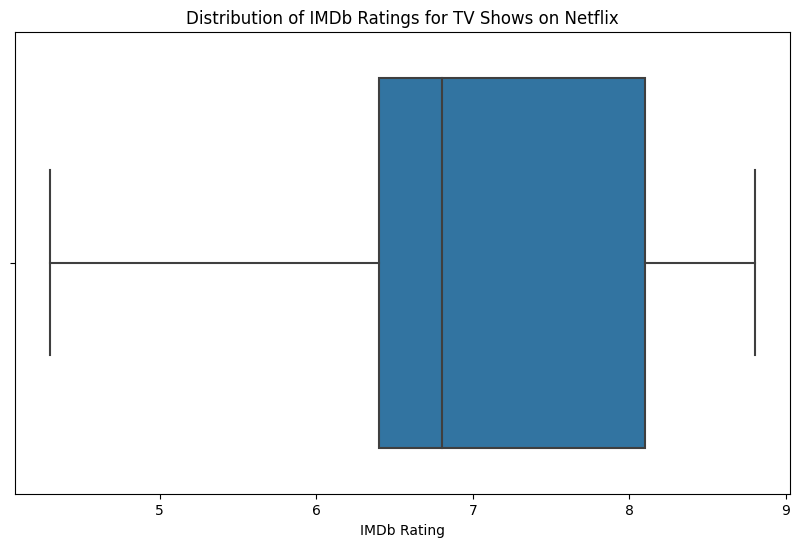

In [53]:
# Check summary statistics of the 'averageRating' column
print(filtered_df['averageRating'].describe())

# Create a box plot to visualize the distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['averageRating'])
plt.title('Distribution of IMDb Ratings for TV Shows on Netflix')
plt.xlabel('IMDb Rating')
plt.show()


<ipython-input-112-a3869c8fef28>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-a3869c8fef28>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-a3869c8fef28>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



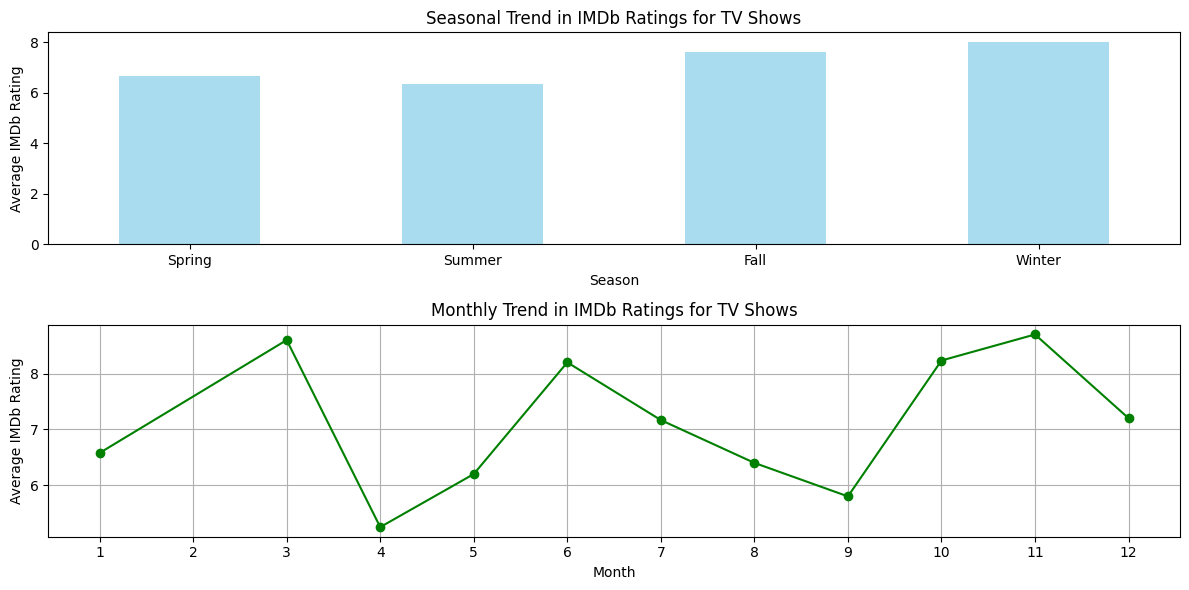

In [112]:

# Filter the dataset to include only TV shows
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
# Convert the 'date_added' column to datetime
tv_shows['date_added'] = pd.to_datetime(tv_shows['date_added'], errors='coerce')
# Extract the month and season from the release date
tv_shows['month_added'] = tv_shows['date_added'].dt.month
tv_shows['season_added'] = (tv_shows['month_added'] % 12 + 3) // 3  # Divide the months into seasons
# Group by month and calculate average IMDb rating
month_avg_ratings = tv_shows.groupby('month_added')['averageRating'].mean()
# Group by season and calculate average IMDb rating
season_avg_ratings = tv_shows.groupby('season_added')['averageRating'].mean()
# Data visualization
plt.figure(figsize=(12, 6))
# Seasonal trend in IMDb ratings
plt.subplot(2, 1, 1)
season_avg_ratings.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Season')
plt.ylabel('Average IMDb Rating')
plt.title('Seasonal Trend in IMDb Ratings for TV Shows')
plt.xticks(range(4), ['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
# Monthly trend in IMDb ratings
plt.subplot(2, 1, 2)
month_avg_ratings.plot(kind='line', marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Average IMDb Rating')
plt.title('Monthly Trend in IMDb Ratings for TV Shows')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


Question 11

we have only cast column to compare diversity

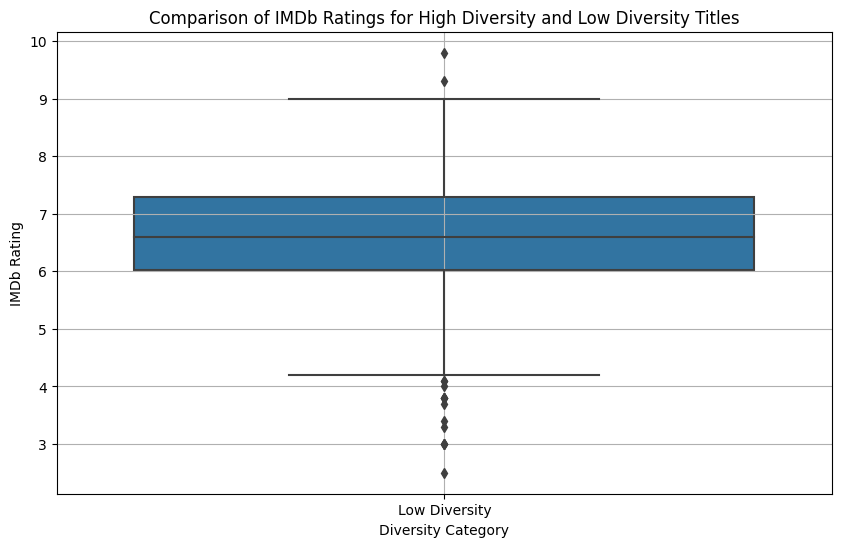

In [74]:


# Convert the 'cast' column to strings
netflix_df['cast'] = netflix_df['cast'].astype(str)

# Calculate a diversity score for each title based on the cast column
# You can define your own criteria for diversity
# In this example, we'll assume a binary score: 1 for diverse cast and 0 for non-diverse cast
diverse_keywords = ['diverse_keyword1', 'diverse_keyword2']  # Replace with relevant keywords
netflix_df['diversity_score'] = netflix_df['cast'].apply(lambda cast: 1 if any(keyword in cast.lower() for keyword in diverse_keywords) else 0)

# Categorize titles based on diversity score (you can adjust the threshold)
# In this example, titles with diversity_score = 1 are categorized as "High Diversity"
netflix_df['diversity_category'] = netflix_df['diversity_score'].apply(lambda score: 'High Diversity' if score == 1 else 'Low Diversity')

# Create boxplots to compare IMDb ratings for "High Diversity" and "Low Diversity" titles
plt.figure(figsize=(10, 6))
sns.boxplot(x='diversity_category', y='averageRating', data=netflix_df)
plt.xlabel('Diversity Category')
plt.ylabel('IMDb Rating')
plt.title('Comparison of IMDb Ratings for High Diversity and Low Diversity Titles')
plt.grid()

plt.show()


Question 12

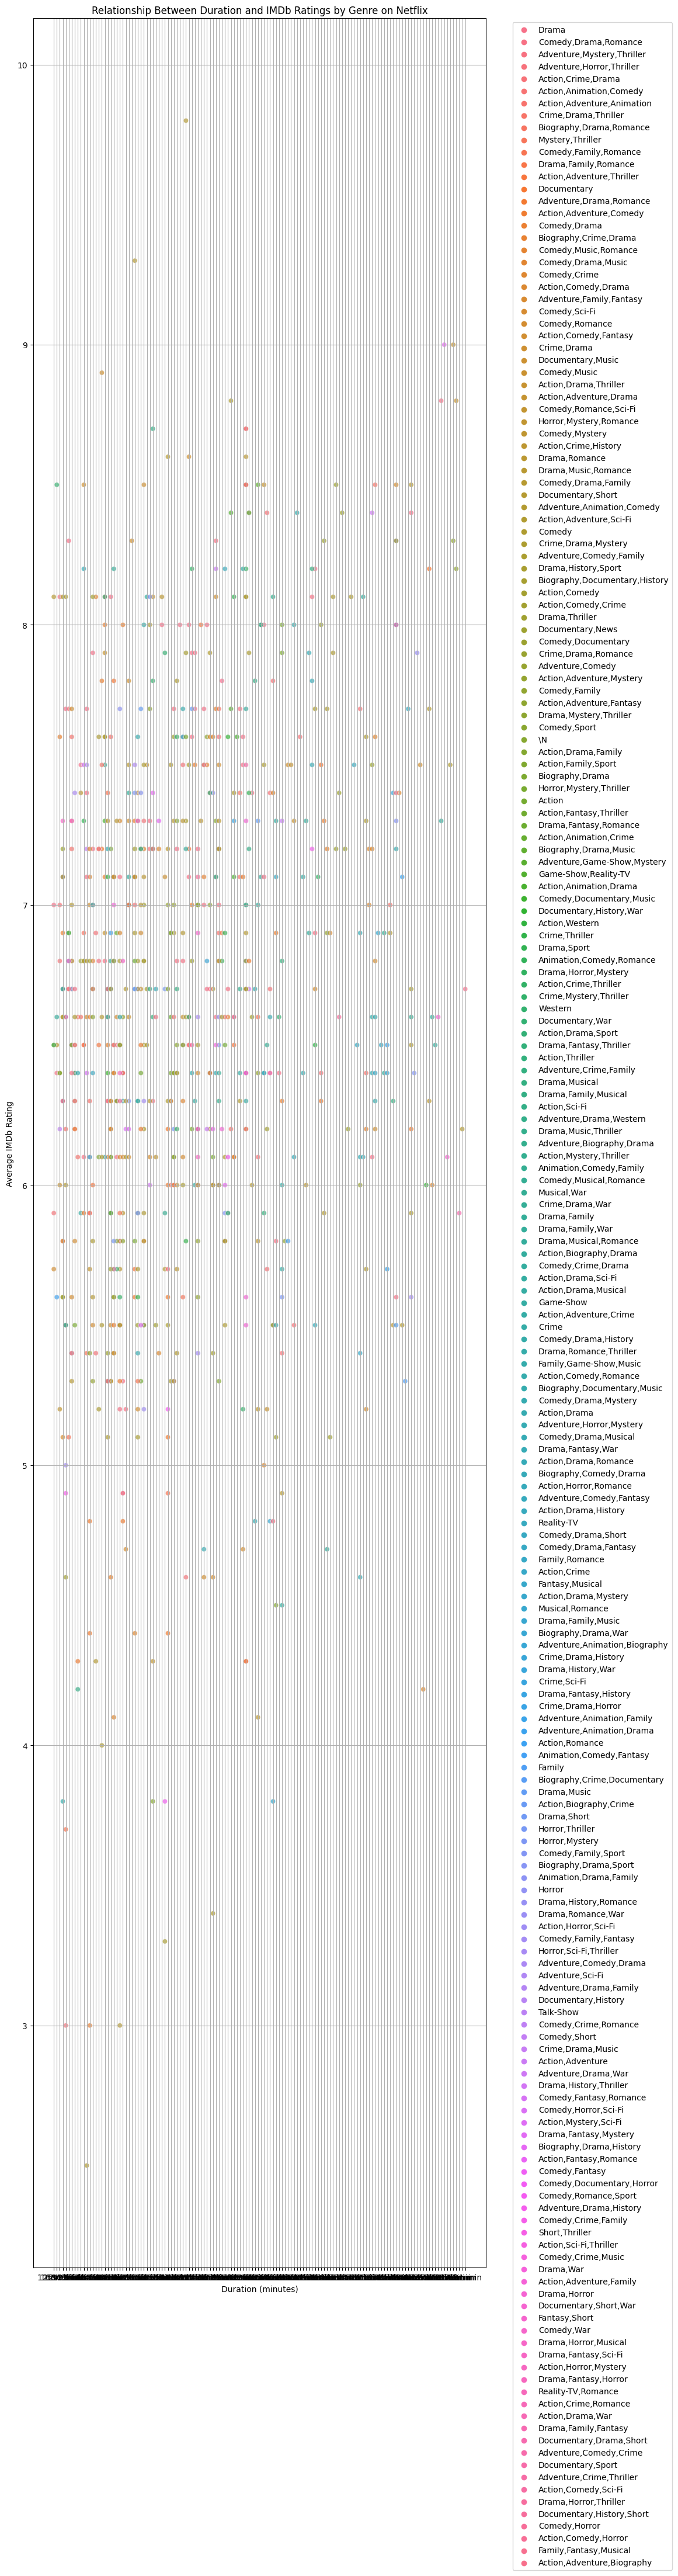

In [76]:
# Create a scatterplot or boxplot for each genre
plt.figure(figsize=(10, 50))
sns.scatterplot(data=netflix_df, x='duration', y='averageRating', hue='genres', alpha=0.7)
plt.title('Relationship Between Duration and IMDb Ratings by Genre on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Average IMDb Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Question 13

Since our DataFrame doesn't have a specific column for "original language," you can analyze IMDb ratings based on the "country" column as a proxy for language. You can assume that titles from the same country share the same original language. Here's the code for creating a stacked bar chart based on the "country" column:

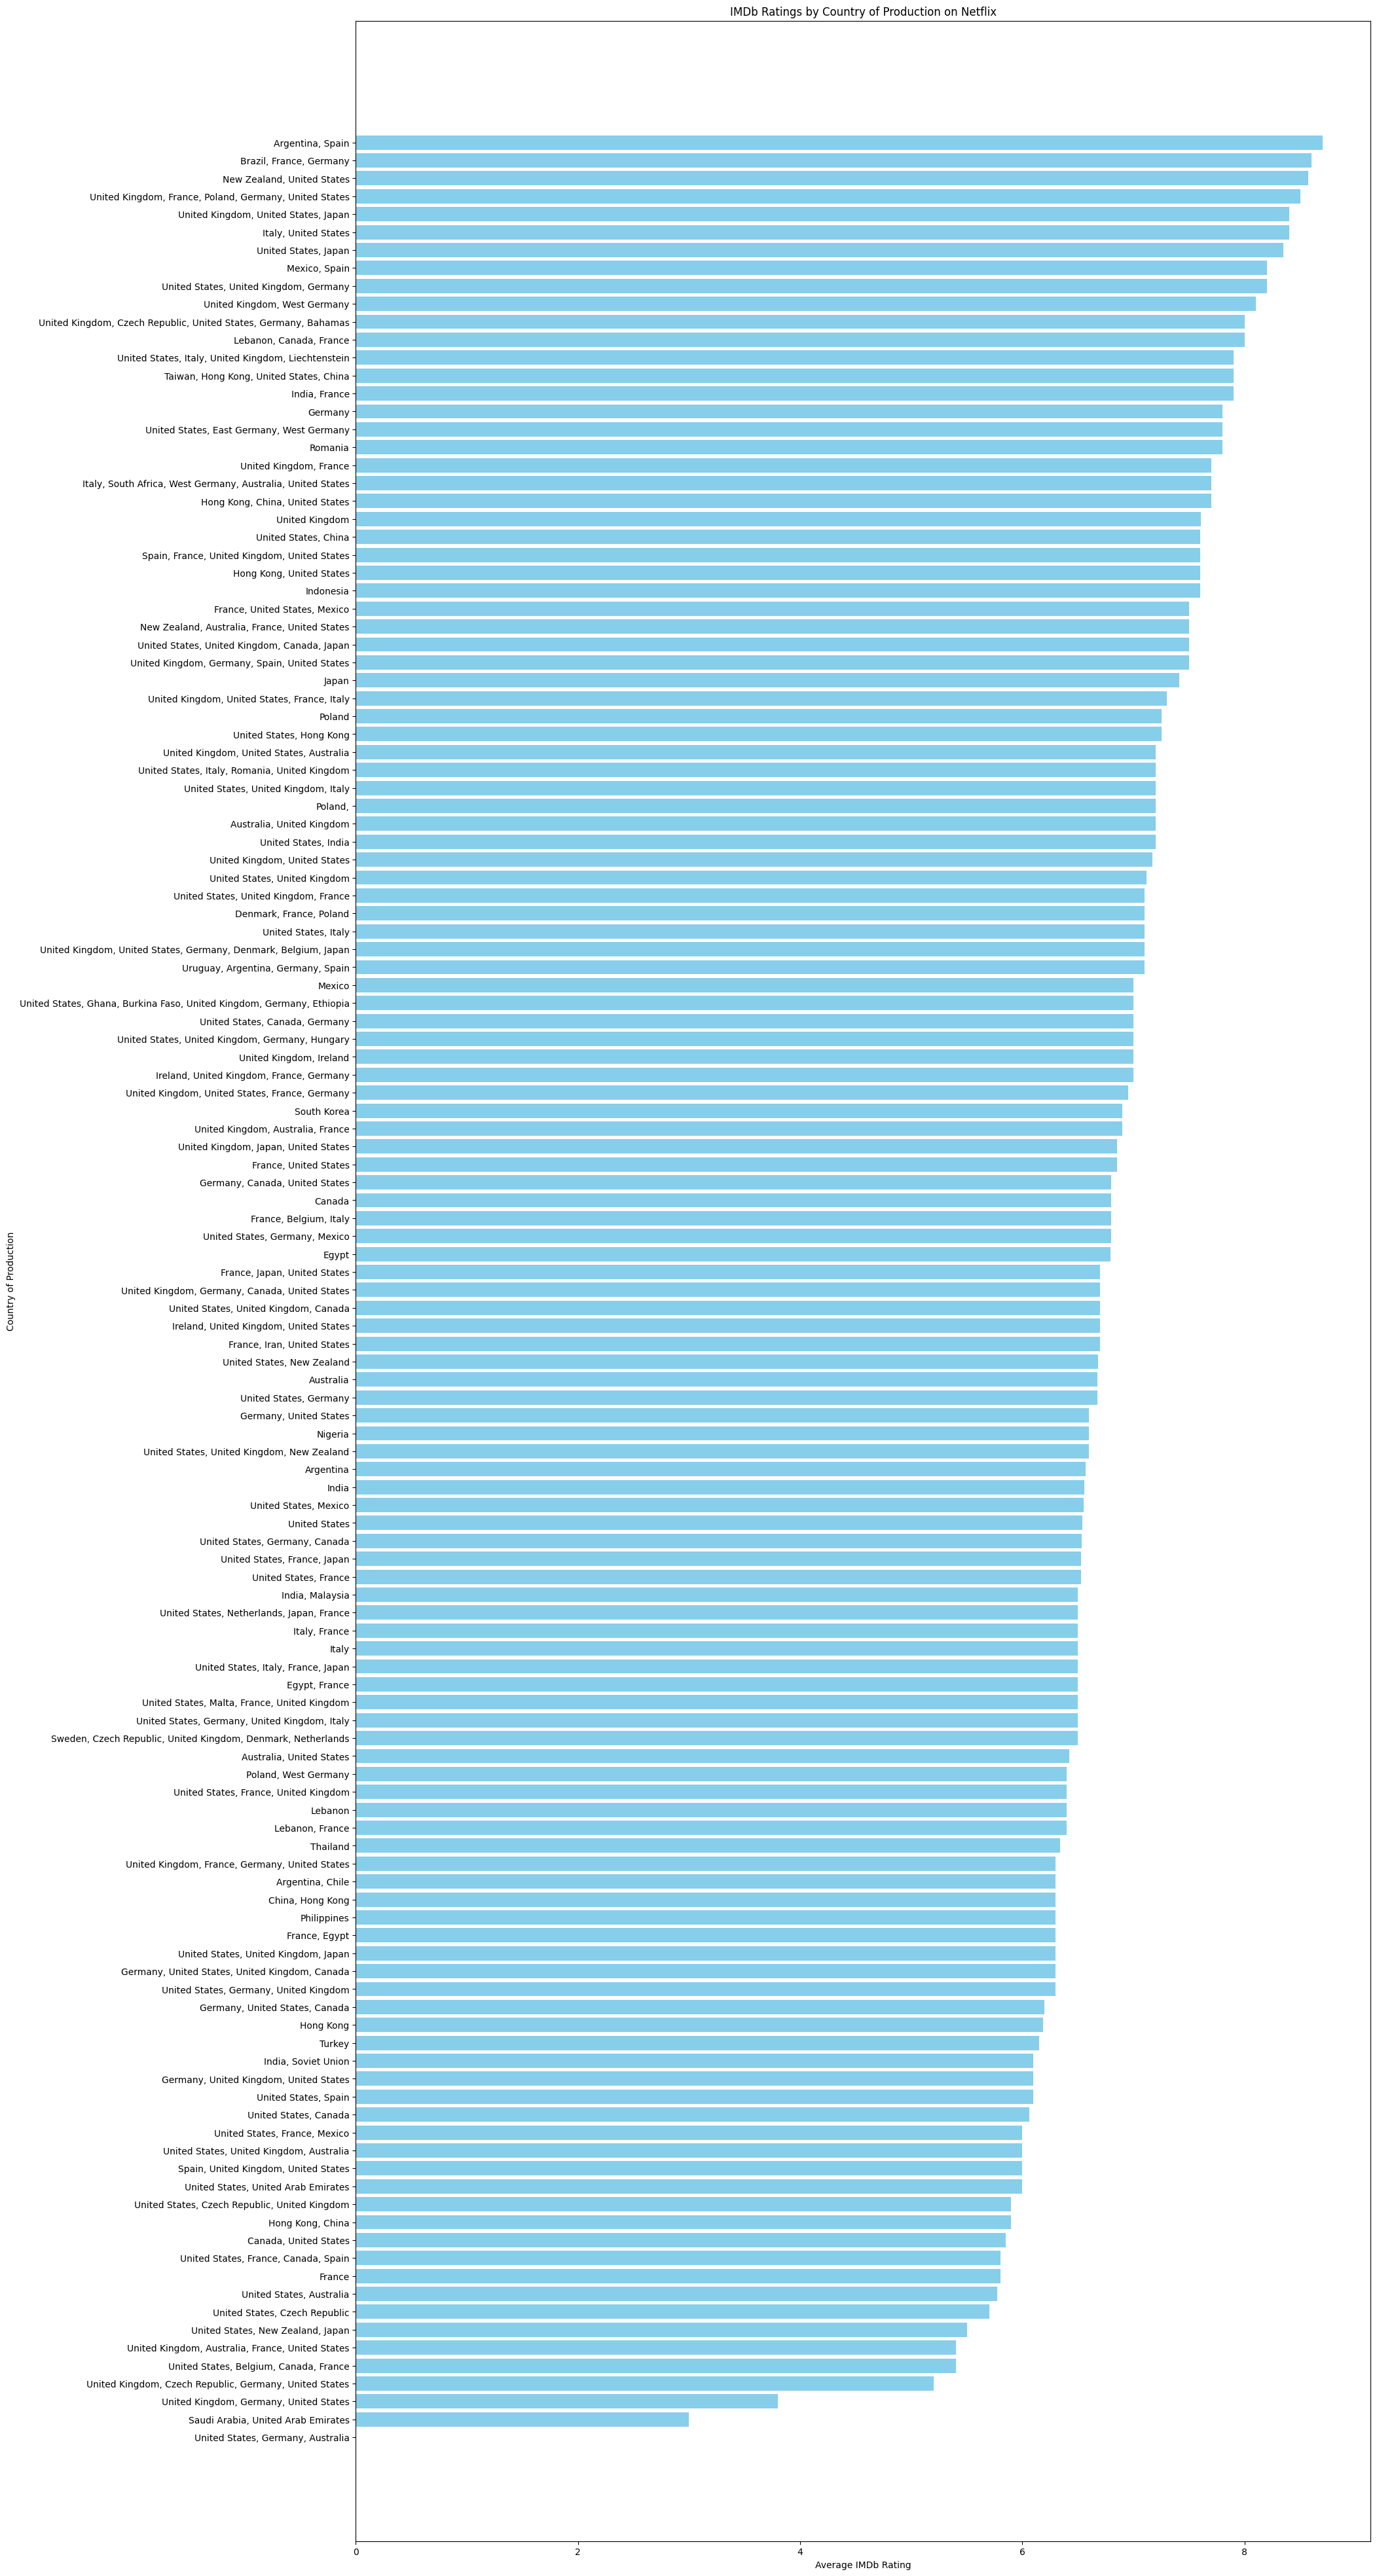

In [72]:

# Columns: 'country' for the country of production and 'averageRating' for IMDb ratings

# Group the data by country of production and calculate the average IMDb rating for each country
country_ratings = netflix_df.groupby('country')['averageRating'].mean().reset_index()

# Sort the countries by average IMDb rating (optional)
country_ratings = country_ratings.sort_values(by='averageRating', ascending=False)

# Create a stacked bar chart to visualize IMDb ratings by country of production
plt.figure(figsize=(20,50))
plt.barh(country_ratings['country'], country_ratings['averageRating'], color='skyblue')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Country of Production')
plt.title('IMDb Ratings by Country of Production on Netflix')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rating at the top
plt.show()


Question 14

This is a generic question , you need to take some other datasets and merge , skip this question

Question 15

Average IMDb rating for titles associated with Tom Hanks: 6.58


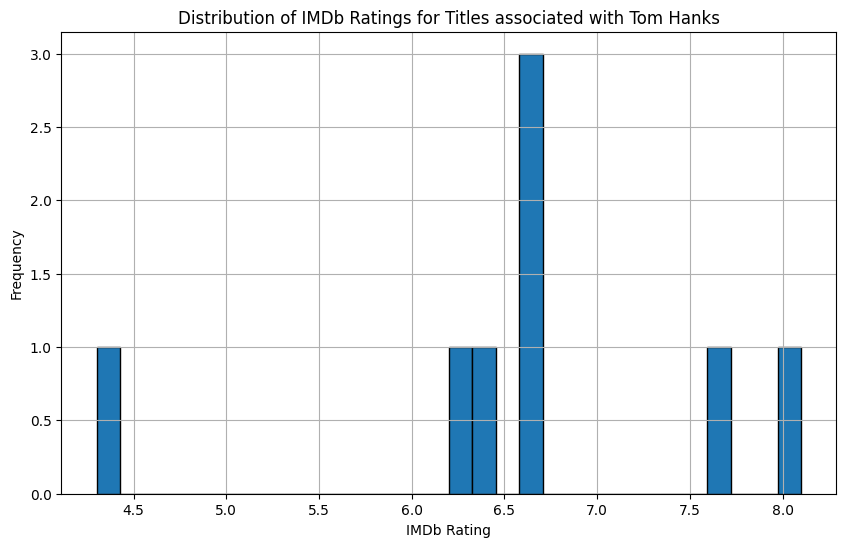

In [80]:

# Define the actor for analysis (Tom Hanks)
actor_name = 'Tom Hanks'

# Create a new DataFrame for titles associated with Tom Hanks
actor_df = netflix_df[netflix_df['cast'].str.contains(actor_name, case=False)]

# Calculate the average IMDb rating for titles associated with Tom Hanks
average_rating = actor_df['averageRating'].mean()

# Print the result
print(f"Average IMDb rating for titles associated with {actor_name}: {average_rating:.2f}")

# Create a histogram to visualize the distribution of IMDb ratings for titles associated with Tom Hanks
plt.figure(figsize=(10, 6))
plt.hist(actor_df['averageRating'], bins=30, edgecolor='k')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title(f'Distribution of IMDb Ratings for Titles associated with {actor_name}')
plt.grid(True)
plt.show()


Question 16

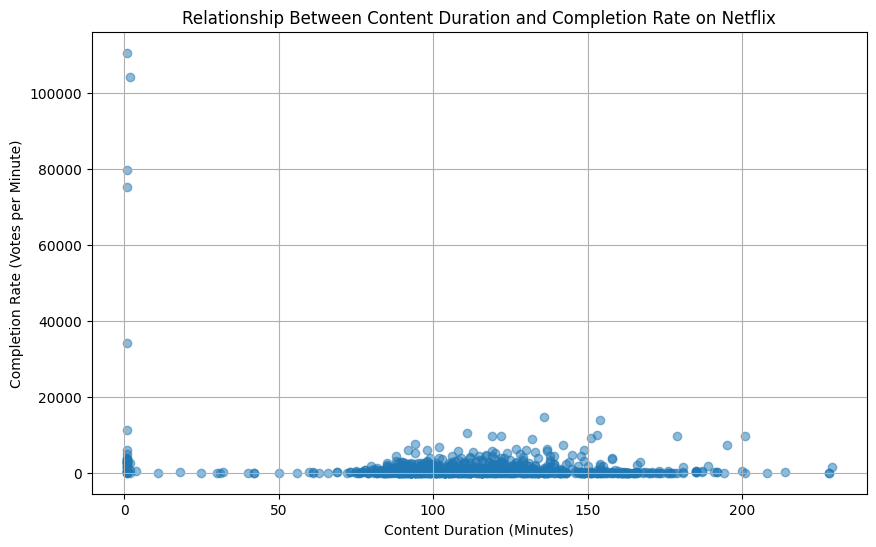

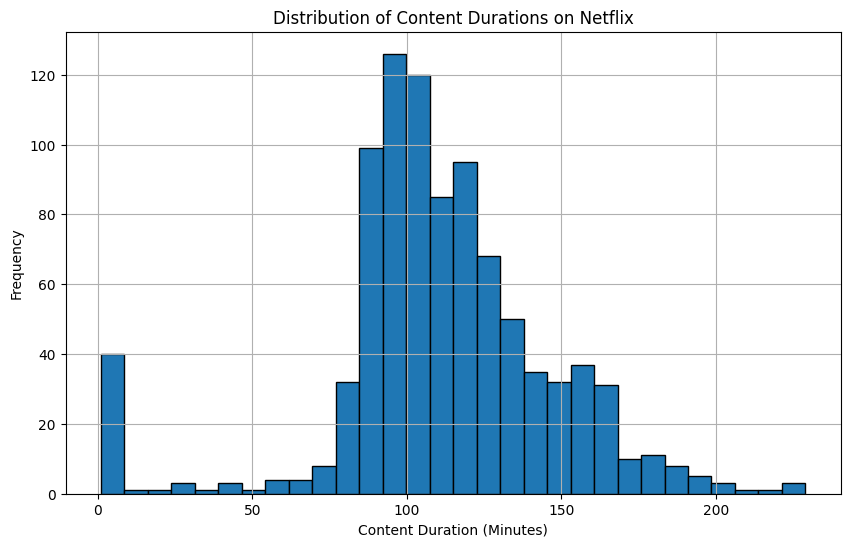

In [78]:
# Calculate completion rates based on content duration
netflix_df['duration'] = netflix_df['duration'].str.extract('(\d+)').astype(int)
netflix_df['completion_rate'] = netflix_df['numVotes'] / netflix_df['duration']

# Create a scatter plot to visualize the relationship between content duration and completion rate
plt.figure(figsize=(10, 6))
plt.scatter(netflix_df['duration'], netflix_df['completion_rate'], alpha=0.5)
plt.xlabel('Content Duration (Minutes)')
plt.ylabel('Completion Rate (Votes per Minute)')
plt.title('Relationship Between Content Duration and Completion Rate on Netflix')
plt.grid(True)
plt.show()

# Create a histogram to visualize the distribution of content durations
plt.figure(figsize=(10, 6))
plt.hist(netflix_df['duration'], bins=30, edgecolor='k')
plt.xlabel('Content Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Content Durations on Netflix')
plt.grid(True)
plt.show()

question 17

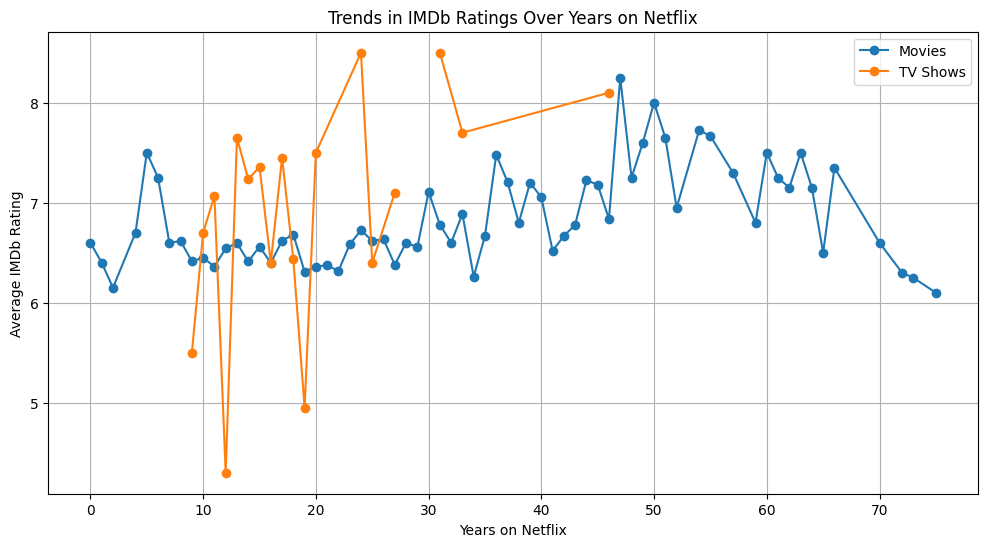

In [81]:


# Ensure 'date_added' column is in datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Calculate the years each title has been on Netflix
netflix_df['years_on_netflix'] = netflix_df['date_added'].dt.year - netflix_df['release_year']

# Group data by 'years_on_netflix' and calculate the average IMDb rating
ratings_by_years = netflix_df.groupby(['years_on_netflix', 'type'])['averageRating'].mean().reset_index()

# Separate data for movies and TV shows
movies_ratings = ratings_by_years[ratings_by_years['type'] == 'Movie']
tv_shows_ratings = ratings_by_years[ratings_by_years['type'] == 'TV Show']

# Create line plots to visualize trends in IMDb ratings over the years on Netflix
plt.figure(figsize=(12, 6))
plt.plot(movies_ratings['years_on_netflix'], movies_ratings['averageRating'], label='Movies', marker='o')
plt.plot(tv_shows_ratings['years_on_netflix'], tv_shows_ratings['averageRating'], label='TV Shows', marker='o')
plt.xlabel('Years on Netflix')
plt.ylabel('Average IMDb Rating')
plt.title('Trends in IMDb Ratings Over Years on Netflix')
plt.legend()
plt.grid(True)
plt.show()


Question 18

This is just for your understading ipywidgets isnt covered in class. will try to implement in plotly

In [83]:
import ipywidgets as widgets
from ipywidgets import interact



# Function to calculate average IMDb ratings for selected genres
def calculate_average_ratings(selected_genres):
    selected_df = netflix_df[netflix_df['genres'].str.contains('|'.join(selected_genres))]
    genre_avg_ratings = selected_df.groupby('genres')['averageRating'].mean().sort_values(ascending=False)
    genre_avg_ratings.plot(kind='bar', figsize=(12, 6))
    plt.xlabel('Genres')
    plt.ylabel('Average IMDb Rating')
    plt.title('Average IMDb Ratings by Selected Genres')
    plt.xticks(rotation=45)
    plt.show()

# Get a list of unique genres in the dataset
all_genres = netflix_df['genres'].str.split(', ').explode().unique()

# Create a multi-select widget for genres
genre_selector = widgets.SelectMultiple(
    options=all_genres,
    description='Select Genres:',
    disabled=False
)

# Create an interactive plot based on selected genres
interact(calculate_average_ratings, selected_genres=genre_selector)


interactive(children=(SelectMultiple(description='Select Genres:', options=('Drama', 'Comedy,Drama,Romance', '…

<function __main__.calculate_average_ratings(selected_genres)>

Using plotly

In [86]:

# Function to calculate average IMDb ratings for selected genres
def calculate_average_ratings(selected_genres):
    selected_df = netflix_df[netflix_df['genres'].str.split(', ').explode().isin(selected_genres)]
    genre_avg_ratings = selected_df.groupby('genres')['averageRating'].mean().sort_values(ascending=False).reset_index()

    fig = px.bar(
        genre_avg_ratings,
        x='genres',
        y='averageRating',
        title='Average IMDb Ratings by Selected Genres',
        labels={'genres': 'Genres', 'averageRating': 'Average IMDb Rating'}
    )

    fig.update_xaxes(tickangle=45)
    fig.show()

# Get a list of unique genres in the dataset
all_genres = netflix_df['genres'].str.split(', ').explode().unique()

# Create an interactive plot based on selected genres
calculate_average_ratings(all_genres)  # Replace with the genres you want to display


Question 19

In [92]:


# Preprocess the data to count the number of titles released each year
netflix_df['release_year'] = pd.to_datetime(netflix_df['date_added']).dt.year
yearly_counts = netflix_df['release_year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Number of Titles']

# Create an interactive Plotly line chart
fig = px.line(
    yearly_counts,
    x='Year',
    y='Number of Titles',
    title='Growth of Netflix Content Over the Years',
    labels={'Year': 'Year', 'Number of Titles': 'Number of Titles'},
    markers=True
)

# Add hover labels to display details
fig.update_traces(mode='markers+lines', hovertemplate='Year: %{x}<br>Number of Titles: %{y}')

# Display the interactive chart
fig.show()


Question 20

In [100]:

# Define the desired genre, content type, and time period for filtering
selected_genres = ['Drama', 'Comedy']  # Replace with the genres you want to filter by, or set to None for no genre filter
selected_content_types = ['Movie']  # Replace with the content types you want to filter by, or set to None for no content type filter
selected_years = (2010, 2022)  # Replace with the desired release year range, or set to None for no year filter

# Filter the dataset based on the selected genre, content type, and time period
filtered_df = netflix_df

if selected_genres:
    filtered_df = filtered_df[filtered_df['genres'].str.contains('|'.join(selected_genres), na=False)]

if selected_content_types:
    filtered_df = filtered_df[filtered_df['type'].isin(selected_content_types)]

if selected_years:
    min_year, max_year = selected_years
    filtered_df = filtered_df[(filtered_df['release_year'] >= min_year) & (filtered_df['release_year'] <= max_year)]

# Create the scatter plot
fig = px.scatter(
    filtered_df,
    x='averageRating',
    y='numVotes',
    color='type',
    hover_name='title',
    title='IMDb Ratings vs. User Reviews',
    labels={'averageRating': 'IMDb Rating', 'numVotes': 'User Reviews'}
)

fig.show()


Question 21

In [99]:
# Define the desired genre and release year range for filtering
selected_genre = 'Comedy'  # Replace with the genre you want to filter by, or set to None for no genre filter
release_year_range = (2010, 2022)  # Replace with the desired release year range, or set to None for no year filter

# Filter the dataset based on the selected genre and release year range
filtered_df = netflix_df

if selected_genre:
    filtered_df = filtered_df[filtered_df['genres'].str.contains(selected_genre, na=False)]

if release_year_range:
    min_year, max_year = release_year_range
    filtered_df = filtered_df[(filtered_df['release_year'] >= min_year) & (filtered_df['release_year'] <= max_year)]

# Create the scatter plot
fig = px.scatter(
    filtered_df,
    x='runtimeMinutes',
    y='averageRating',
    hover_name='title',
    title='IMDb Ratings vs. Duration',
    labels={'runtimeMinutes': 'Duration (Minutes)', 'averageRating': 'IMDb Rating'}
)

fig.show()

Question 22

In [103]:
# Group the data by region or country and count the number of titles in each
region_counts = netflix_df['country'].value_counts().reset_index()
region_counts.columns = ['Region', 'Number of Titles']

# Create a bar chart
fig = px.bar(region_counts, x='Region', y='Number of Titles', title='Number of Titles on Netflix by Region')
fig.update_xaxes(categoryorder='total ascending')

fig.show()

Question 23

This isnt part of midterm its just for knowledge and self study for you

In [106]:
import networkx as nx
import plotly.graph_objects as go

In [111]:

# Preprocess the data to extract collaborations
# For example, you can extract collaborations between actors and directors
collaborations = []
for _, row in netflix_df.iterrows():
    cast = str(row['cast'])  # Convert to string
    director = str(row['director'])  # Convert to string
    cast = cast.split(', ')

    for actor in cast:
        collaborations.append((director, actor))

# Create a network graph
G = nx.Graph()
G.add_edges_from(collaborations)

# Manually position nodes in the graph
pos = nx.spring_layout(G)

# Create an interactive network graph using Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(thickness=15, title='Node Connections'),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'{node}: # of connections: {len(adjacencies[1])}')

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Display the interactive network graph
fig.show()
